In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.nddata import Cutout2D
from astropy import units
from astropy.io import fits
from astropy.modeling.models import Gaussian2D
import glob
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from clustar.core import ClustarData
from clustar.search import Clustar
from astropy.visualization import ZScaleInterval
from astropy.io import fits
import random
from scipy.ndimage import rotate

In [2]:
def crop_middle_50_percent(fits): return fits[(int(fits.shape[1]*.25)):(int(fits.shape[1]*.75)), 
                                              (int(fits.shape[1]*.25)):(int(fits.shape[1]*.75))]

def crop_around_max_value_100x100(fits):
    (x, y) = np.unravel_index(np.argmax(fits, axis=None), fits.shape)
    return fits[x-50:x+50, y-50:y+50]


## Prepare the data

In [18]:
# Load the data, fits_data is a list of matrices from a folder of fits files
fits_data = [fits.getdata(file).squeeze() for file in glob.glob('data/test_pos/*.fits')]

# Reshape the data to be the middle 50% of the image, 
# This ensures that no extreme edge values are included where noise to intense 
fits_data = [crop_middle_50_percent(file) for file in fits_data]

#Rotate the data so that the stars are aligned according to predefined angles
fits_data = [rotate(data, degrees, reshape=False) for (data, degrees) in list(zip(fits_data, [0, 0, -15, -15, -9, -9, -13, -13]))]

#Apply fits_crop_around_max to all the fits files
#This now we have a list of 100x100 matrices where the star is in the middle and aligned
fits_data = [crop_around_max_value_100x100(file) for file in fits_data]

print(len(fits_data))

8


## Augment the data

In [19]:

# Multiply two matrices together and return the square root of the result
def multiply_and_sqrt(a, b): return np.sqrt(np.multiply(a, b))

In [20]:
# Create a list of 100x100 matrices where each matrix is the square root of the product of two matrices from fits_data

for i in range(0,7):
    if i%100 == 0: print(i)
    for j in range(i, 7):
        print(i, j)
        fits_data.append(multiply_and_sqrt(fits_data[i], fits_data[j]))
        
print(len(fits_data))


0
0 0
0 1
0 2
0 3
0 4
0 5
0 6
1 1
1 2
1 3
1 4
1 5
1 6
2 2
2 3
2 4
2 5
2 6
3 3
3 4
3 5
3 6
4 4
4 5
4 6
5 5
5 6
6 6
36


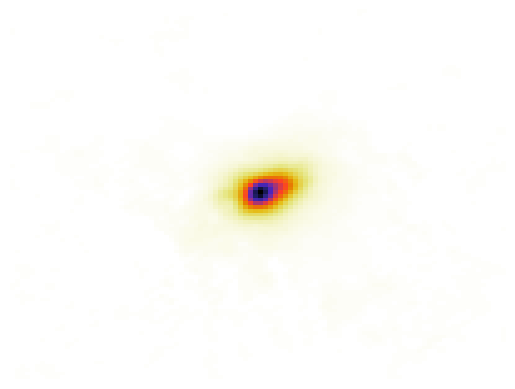

In [24]:
# Show all matrices in fits_data
for i in range(0, len(fits_data)):
    plt.imshow(fits_data[i], cmap='CMRmap_r')
    plt.show()

In [145]:
# Experimentera mer me alpha, buffer_size
radius_factor = 0.5
chunk_size = 100
quantile = 0.95
apply_gradient = True
alpha = 0.5
buffer_size = 0.5
group_size = 0.5
group_factor = 0.75
metrics = ['standard_deviation', 'variance', 'averege', 'weighted_averege']
threshold = 0.025
quantile = 0.95


In [195]:
#Omstart



# Create a Clustar object
cs = Clustar(radius_factor=radius_factor, threshold=threshold, quantile=quantile, apply_gradient=apply_gradient,
             metric=metrics[0], group_factor=group_factor)
# Load the data into the Clustar object
cs.run(directory='data/test_pos/')

for clustar_data in cs.data:

    
    img_data = clustar_data.image.data
    
    if len(clustar_data.groups) > 0:
        disk = clustar_data.groups[0]
        im_data = im_data[disk]
        



    else:

        (x, y) = img_data.shape[2], img_data.shape[3]
        img_data = img_data[0, 0, (int(y*.25)):(int(y*.75)),
                            (int(x*.25)):(int(x*.75))]
        max_indices = np.unravel_index(np.argmax(img_data), img_data.shape)
    



    print(clustar_data.groups[0])
    





File 'Serpens_South_C7': 100%|██████████| 8/8 [00:00<00:00,  8.62file/s, num_errors=0, num_flags=7]


IndexError: tuple index out of range

In [140]:
# Experimentera mer me alpha, buffer_size
radius_factor = 0.5
chunk_size = 100
quantile = 0.95
apply_gradient = True
alpha = 0.5
buffer_size = 0.5
group_size = 0.5
group_factor = 0.75
metrics = ['standard_deviation', 'variance', 'averege', 'weighted_averege']
threshold = 0.025
quantile = 0.95

#Create a Clustar object
cs = Clustar(radius_factor=radius_factor, threshold=threshold, quantile=quantile, apply_gradient=apply_gradient,
             metric=metrics[0], group_factor=group_factor)
#Load the data into the Clustar object
cs.run(directory='data/test_pos/' )

# Run the identification algorithm
for clustar_data in cs.data:
    # clustar_data.identify()
    if clustar_data.groups == None:
        (x, y) = img_data.shape[2], img_data.shape[3]
        img_data = img_data[0, 0, (int(y*.25)):(int(y*.75)),
                        (int(x*.25)):(int(x*.75))]
        max_indices = np.unrav
        
    else:
        for clustar_disk in clustar_data.groups:
            img = (clustar_disk.image)
            print(img.ndarray)
    


File 'Serpens_South_C7': 100%|██████████| 8/8 [00:00<00:00,  9.01file/s, num_errors=0, num_flags=7]


AttributeError: '_Image' object has no attribute 'ndarray'

standard_deviation 0.6 0.1 0.1 0.1


File 'Serpens_South_C7': 100%|██████████| 8/8 [00:00<00:00,  8.42file/s, num_errors=0, num_flags=7]


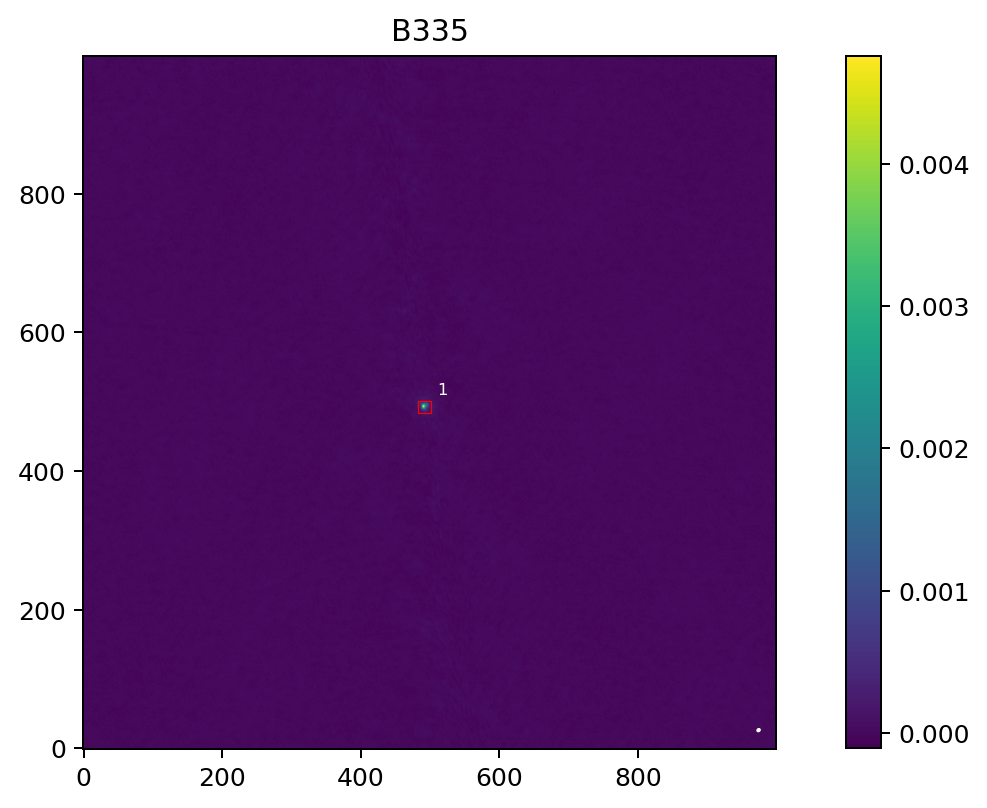

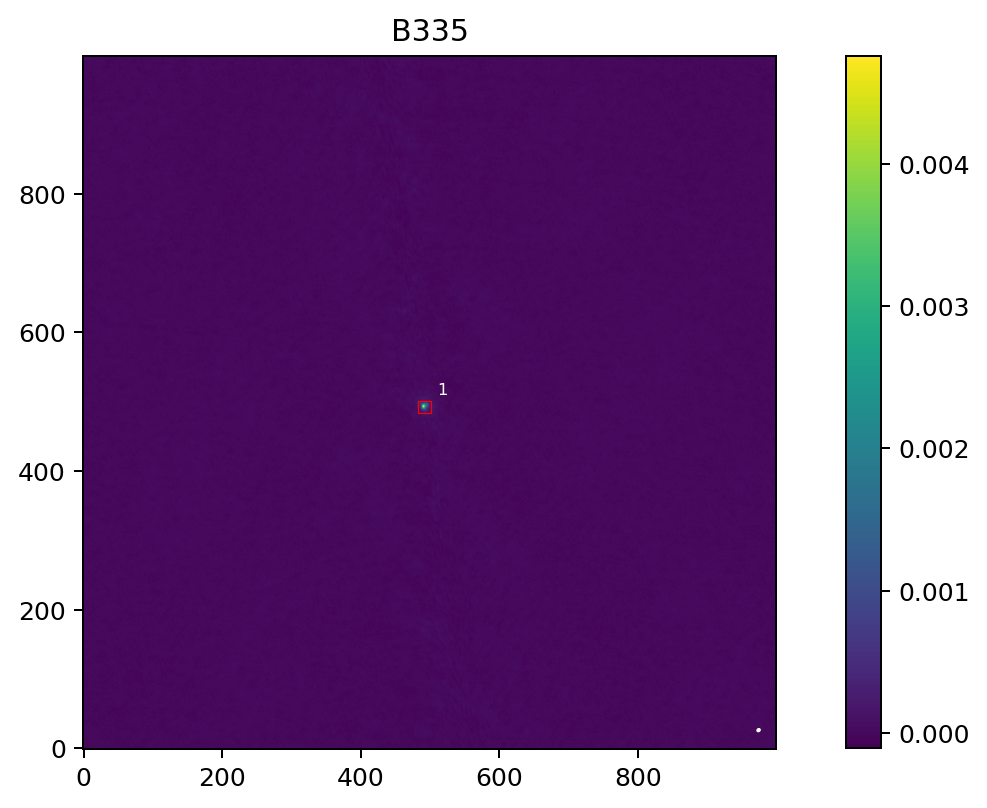

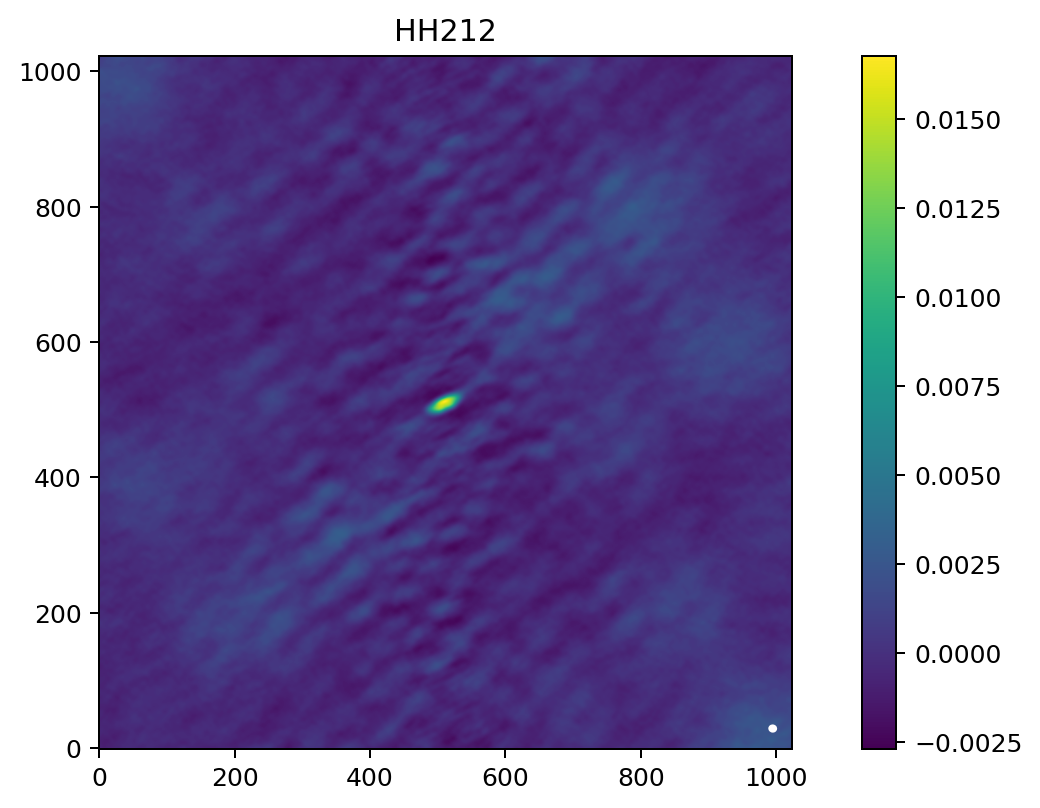

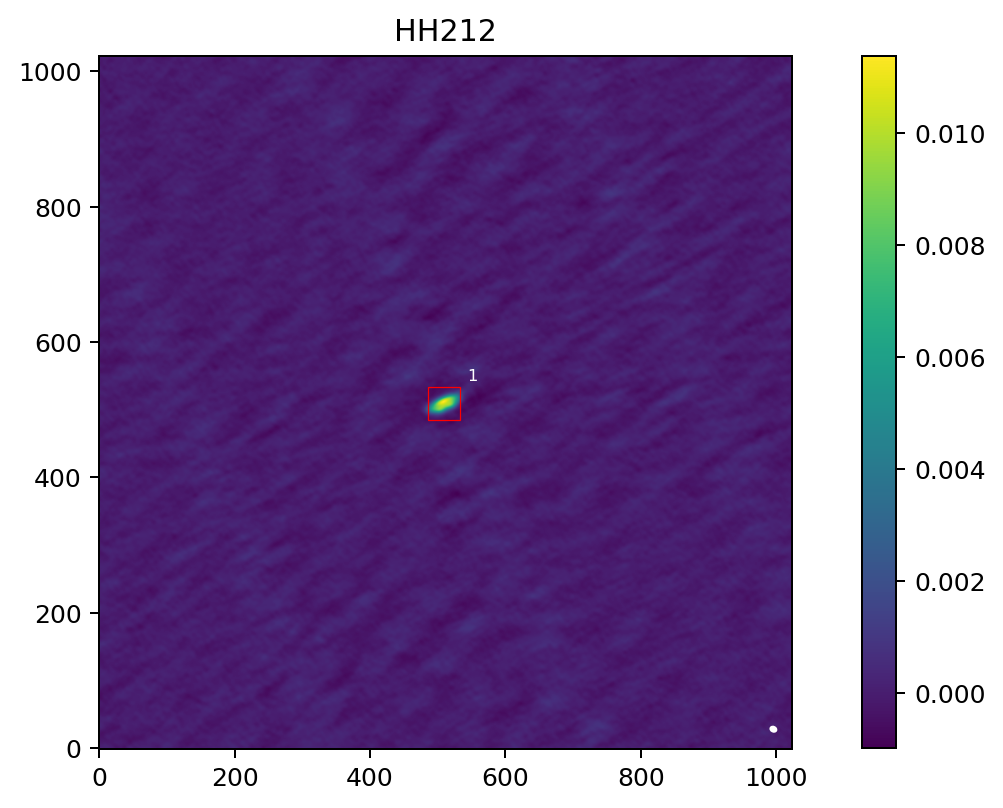

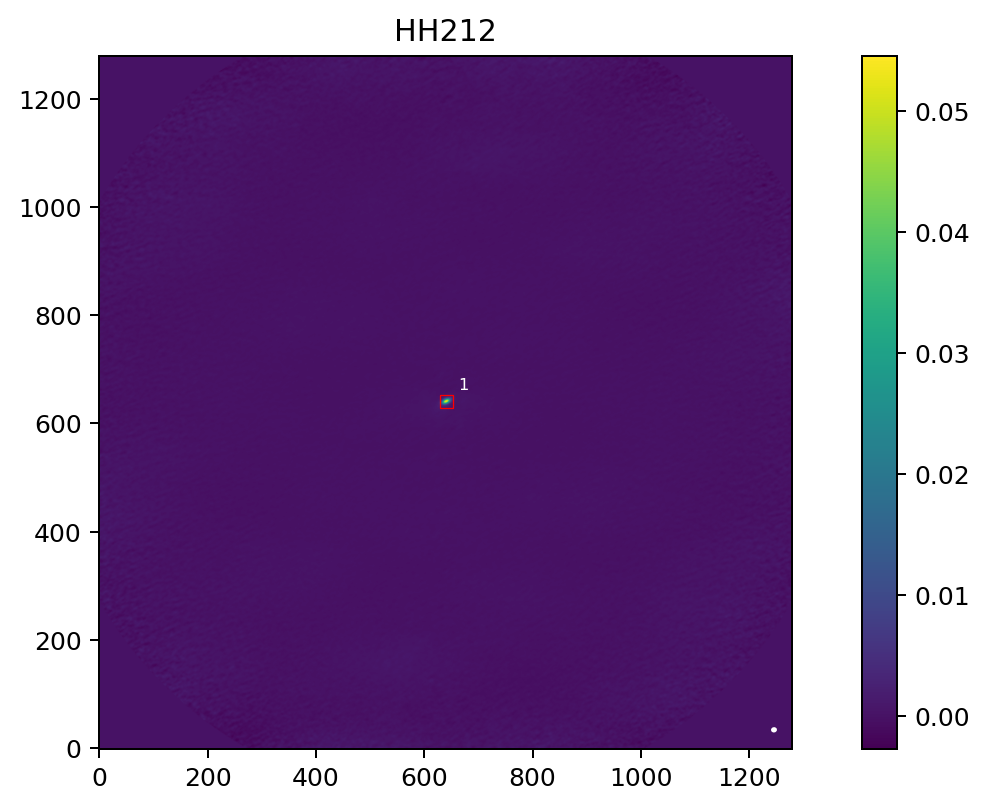

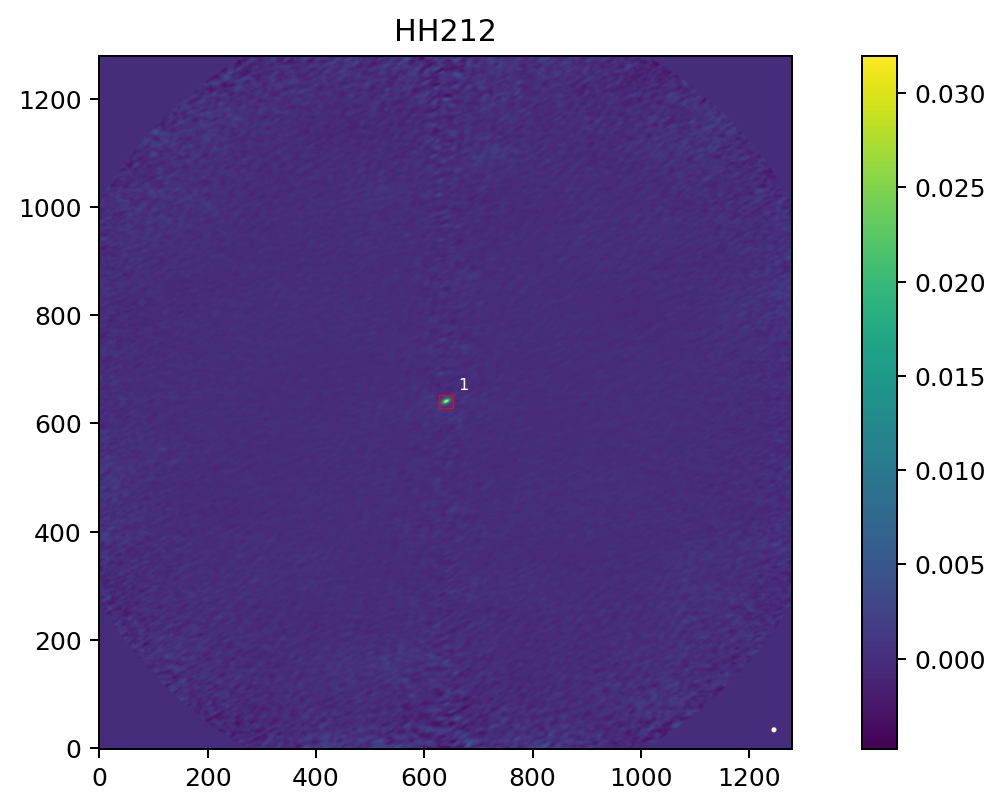

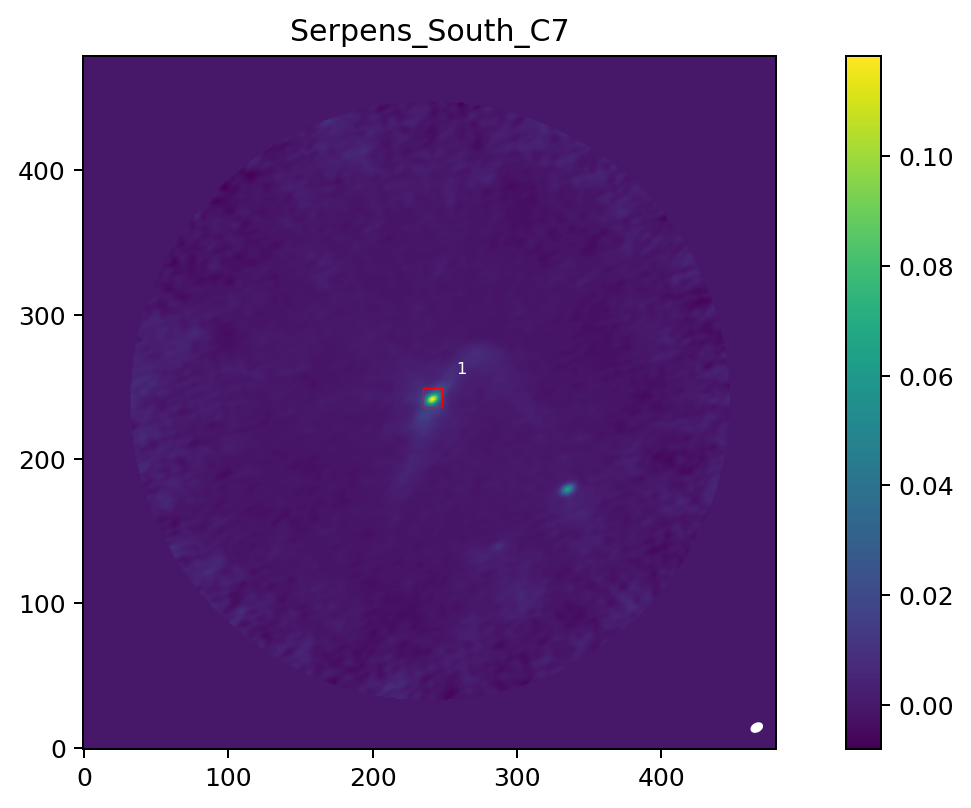

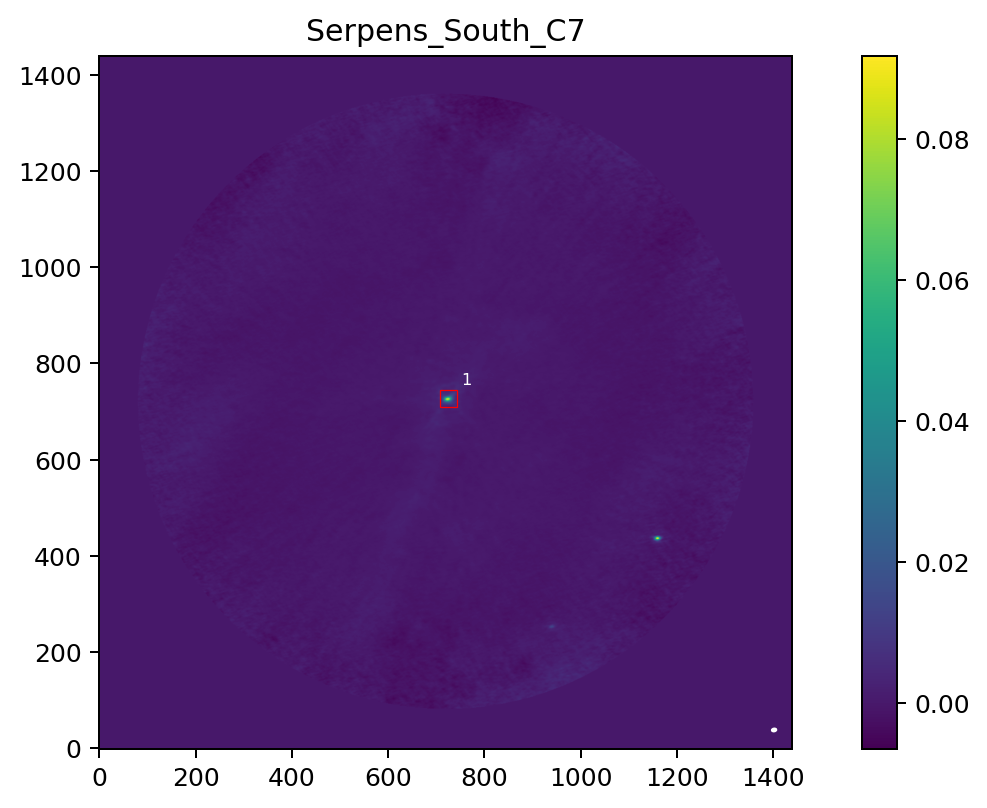

Initializing:   0%|          | 0/8 [00:00<?, ?file/s]

standard_deviation 0.6 0.1 0.1 0.30000000000000004


File 'HH212':  38%|███▊      | 3/8 [00:01<00:01,  2.97file/s, num_errors=0, num_flags=2]


KeyboardInterrupt: 

In [103]:
# Code that tests several different parameters for the clustar algorithm

for metrics in metrics:
    for group_factor in np.arange(0.6, .9, 0.1):
        for alpha in np.arange(0.1, 1, 0.2):
            for buffer_size in np.arange(0.1, 1, 0.2):
                for group_size in np.arange(0.1, 1, 0.2):
                    print( metrics, group_factor, alpha, buffer_size, group_size)
                    cs = Clustar(radius_factor=radius_factor, threshold=threshold, quantile=quantile, apply_gradient=apply_gradient,
                                 metric=metrics, group_factor=group_factor)
                    cs.run(directory='data/test_pos/')
                    cs.display(category='all')
                    for i in range(len(objects)):
                        objects[i].identify()

In [102]:
filenames = glob.glob('data/test_pos/*.fits')


for fits_file in filenames:
    img_data = fits.getdata(fits_file)

    #print nan values
    print(np.isnan(img_data).sum())
    
    #replace all nan values with 0
    img_data[np.isnan(img_data)] = 0

    print(np.isnan(img_data).sum())


    #cut out the center of the image and find the max value
    (x, y) = img_data.shape[2], img_data.shape[3]
    img_data = img_data[0,0, (int(y*.25)):(int(y*.75)), (int(x*.25)):(int(x*.75))]
    max_indices = np.unravel_index(np.argmax(img_data), img_data.shape)
    print(max_indices)

    

# cs.display(category='all')

0
0
(243, 241)
0
0
(243, 241)
0
0
(255, 254)
0
0
(255, 252)
121041
0
(320, 321)
121041
0
(320, 321)
95299
0
(121, 122)
790095
0
(365, 364)


In [16]:
cs.data[0]

AttributeError: 'ClustarData' object has no attribute 'display'